In [1]:
import pandas as pd
import numpy as np
import math
import ipywidgets as widgets

##Seaborn for fancy plots. 
#%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (8,8)

## Exploratory Data Analysis

When we went through stats concepts one of the key topics was using some statistical concepts to describe and explore our data prior to using it to make models. This Exploratory Data Analysis helped us see things such as correlations, target imbalances, outliers, and feature distributions. 

EDA is something that we pretty much always want to do, it can also be time consuming and somewhat cumbersome. To start us off in machine learning we'll create a tool to help expidite some of that process, saving us time as we go. 

We'll do a classification, the target is HeartDisease. 

Our features have both numerical and categorical items, which will be good for building our EDA package. 

Below we'll start on the framework of a function that can do EDA for us - we pass in a dataframe (and potentially some arguments), and it will do a bunch of the exploratory stuff for us. The possibilities for this are endless, and we can build and modify on what we have, but some basics that we almost certainly want to explore are:
<ul>
<li>Distributions of numerical varaibles. 
<li>Outliers. 
<li>Correlations. 
<li>For classifications, target value balance. 
<li>Counts for caategorical variables.
<li>Missing or invalid values. 
</ul>

We want all the stuff we normally look at in explortation to be done for us, with little extra effort. The details can vary (and we can make some things configurable via arguments) and we'll likely want to add things at some point, but we can take lots of the grunt work out of doing our EDA. 

There are packages that can be installed that will do similar things for us, generally with a slightly more polished interface, but building this is good practice. 

In [2]:
class edaDF:
    """
    A class used to perform common EDA tasks

    ...

    Attributes
    ----------
    data : dataframe
        a dataframe on which the EDA will be performed
    target : str
        the name of the target column
    cat : list
        a list of the names of the categorical columns
    num : list
        a list of the names of the numerical columns

    Methods
    -------
    setCat(catList)
        sets the cat variable listing the categorical column names to the list provided in the argument catList
        
        Parameters
        ----------
        catlist : list
            The list of column names that are categorical

    setNum(numList)
        sets the cat variable listing the categorical column names to the list provided in the argument catList
        
        Parameters
        ----------
        numlist : list
            The list of column names that are numerical

    countPlots(self, splitTarg=False, show=True)
        generates countplots for the categorical variables in the dataset 

        Parameters
        ----------
        splitTarg : bool
            If true, use the hue function in the countplot to split the data by the target value
        show : bool
            If true, display the graphs when the function is called. Otherwise the figure is returned.
    
    histPlots(self, splitTarg=False, show=True)
        generates countplots for the categorical variables in the dataset 

        Parameters
        ----------
        splitTarg : bool
            If true, use the hue function in the countplot to split the data by the target value
        show : bool
            If true, display the graphs when the function is called. Otherwise the figure is returned. 

    fullEDA()
        Displays the full EDA process. 
    """
    def __init__(self, data, target):
        self.data = data
        self.target = target
        self.cat = []
        self.num = []

    def info(self):
        return self.data.info()

    def giveTarget(self):
        return self.target
        
    def setCat(self, catList):
        self.cat = catList
    
    def setNum(self, numList):
        self.num = numList

    def countPlots(self, splitTarg=False, show=True):
        n = len(self.cat)
        cols = 2
        figure, ax = plt.subplots(math.ceil(n/cols), cols)
        r = 0
        c = 0
        for col in self.cat:
            if splitTarg == False:
                sns.countplot(data=self.data, x=col, ax=ax[r][c])
            if splitTarg == True:
                sns.countplot(data=self.data, x=col, hue=self.target, ax=ax[r][c])
            c += 1
            if c == cols:
                r += 1
                c = 0
        if show == True:
            figure.show()
        return figure

    def histPlots(self, kde=True, splitTarg=False, show=True):
        n = len(self.num)
        cols = 2
        figure, ax = plt.subplots(math.ceil(n/cols), cols)
        r = 0
        c = 0
        for col in self.num:
            #print("r:",r,"c:",c)
            if splitTarg == False:
                sns.histplot(data=self.data, x=col, kde=kde, ax=ax[r][c])
            if splitTarg == True:
                sns.histplot(data=self.data, x=col, hue=self.target, kde=kde, ax=ax[r][c])
            c += 1
            if c == cols:
                r += 1
                c = 0
        if show == True:
            figure.show()
        return figure

    def fullEDA(self):
        out1 = widgets.Output()
        out2 = widgets.Output()
        out3 = widgets.Output()
        out4 = widgets.Output()

        tab = widgets.Tab(children = [out1, out2, out3])
        tab.set_title(0, 'Info')
        tab.set_title(1, 'Categorical')
        tab.set_title(2, 'Numerical')
        display(tab)

        with out1:
            self.info()

        with out2:
            fig2 = self.countPlots(splitTarg=True, show=False)
            plt.show(fig2)
        
        with out3:
            fig3 = self.histPlots(kde=True, show=False)
            plt.show(fig3)



In [3]:
df = pd.read_csv("data/heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df_eda = edaDF(df,"HeartDisease")
print(df_eda.giveTarget())

HeartDisease


In [5]:
df_eda.setCat(["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"])
df_eda.setNum(["Age", "RestingBP", "Cholesterol", "FastingBS", "MaxHR", "Oldpeak"])
#df_eda.countPlots(True)

In [6]:
df_eda.fullEDA()

<ipython-input-2-ab230915e02f>:113: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()


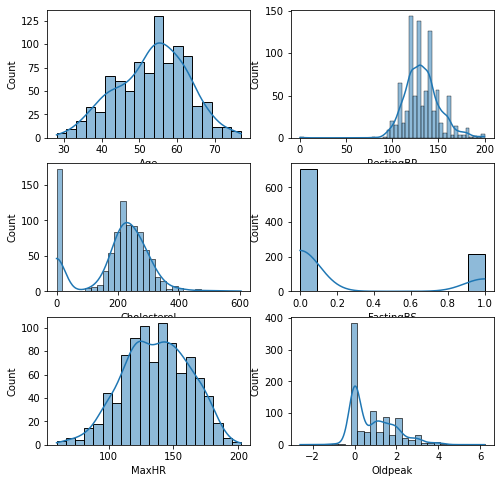

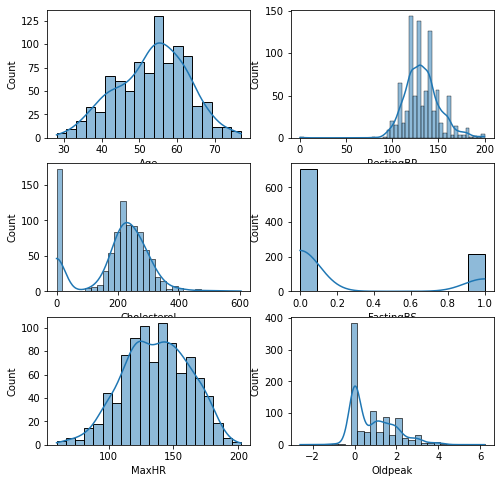

In [7]:
df_eda.histPlots()

## Create an EDA Class

Your first task is to create your own EDA class, optionally based on the example code above. There isn't one correct answer or one specific set of features that your tool needs to do. The overall goal is to do as much of the EDA process as possible, with the least work required each time. Some things to consider:

<ul>
<li>How are different types of data represented and displayed?
<li>What is important to know? E.g. outliers, correlations, distributions, etc...
<li>How much customization is needed? Think about the Seaborn visualizations as an example, each chart has many options that we can optionally modify. E.g. pariplots can be useful, but can also take a long time to generate, would it be better if they were optional?
<li>Code modularity - in general, breaking up large tasks into reusable pieces of code will be preferable. If/when you add to this later on, it'll be much easier. 
<li>Commenting - we'll comment this code in the correct manner. See the example for a pattern that should be enough to follow. Commenting is dull and boring, but generally very important; we leave it mainly to the coding class to cover proper comments, but we'll do it the 'proper' way here since we are creating a portable tool. If someone else was to use this, good comments allow them to make sense of it. 
</ul>

The example code isn't comprehensive or definitive, the intent is to give a few examples of how to put things together (tabs, matplotlib figures, classes, etc). You can use whatever you want to put this together, it is also a good chance to build skills in reading documentation for the differnet libraries to adapt things to what you want. 

This tool will be peer evaluated - you'll each try out 3 other people's EDA tools and judge how useful they are and how easy they are to use. 

<h4>Utility File</h4>

When creating this EDA class, place it in a regular python file, e.g. ml_utils.py. The python file is effectively just one big code cell and pretty much everything that you write should translate directly (there's a slight possibility you might need to adjust somehting, my sample worked as is. If so, Google the error, it is probably common, then ask me if you don't get it). This utility file can also stay with you and be built upon as we go forward; any common code that you use repeatedly can be built into a function in this file, then you can just import it (like thinkstats2 and thinkplot) to your notebook, and use those things without rewriting them. 

This approach is really common, when programming we want to make things into reusable functions almost as often as possible. It saves us work, allows us to not have to think about the same challenge repeatedly, makes it easy to make improvements, and reduces the probablity of making an error. As we go, add to it! 


For development purposes, use this function in the next part, predictions with trees. 